In [34]:
# Import necessary packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tabulate import tabulate
import scipy.io
from scipy import stats
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

# Task 1: Poisson neuron

In [35]:
# Set figure dimensions
plt.rcParams["figure.figsize"] = [10, 15]

## Section A

_Deviations from Poisson neuron model:_

Spontaneous activity refers to the state of the brain in which neurons, especially in the cortex, continue to fire at a lower rate, even when little or no stimulation is provided. Such phenomenon can be observed during the absence of tasks (resting state), mind wandering and sleep, but it is always present in the brain. Although it was initially assumed to involve unrelated firing rates and erratic intervals between spikes, as described by a Poisson process, at times spontaneous activity has yielded Fano factors and coefficients of variations (CV) distant from 1 (the expected value for a Poisson process). For instance, both Fano factors lower and higher than 1 were found in the primary visual cortex (V1) and lower than 1 in the inferior temporal cortex of awake monkeys (Gur et al, 1997; Gershon et al, 1998).

The variable results obtained with traditional approaches, such as the Fano factor, led Swingale et al., 2023, to propose a new method involving the so-called rate-normalised spike train autocorrelation function (ACF) with a logarithmic time-interval scale. Authors argued that traditional approaches poorly explain how a signal deviates from the Poisson hypothesis and are not definitive because several distributions return a Fano factor and CV close to 1. Thus, authors hypothesised that ACF can provide a richer profile of the temporal structure of the signal compared to Fano factor and CV, as ACF accounts for the intervals between any two spikes and not just consecutive ones. In their study, ACF is tested on recordings of cortical spontaneous activity with variable duration obtained from monkeys, cats or mice by Multi-Electrode Arrays (MEA).

_The use of logarithmic scale autocorrelation:_

In its standard form, ACF provides a measure of correlation between spike number, firing probability or firing rate for any possible temporal interval between two spikes. Such concept can better generalise to the overall firing behaviour of a neuron, as it accounts for the interval between any two spikes and not just that between consecutive ones, know as the inter-spike interval (ISI). Therefore, the authors adopt this method and tune it to diagnose possible deviations from the Poisson hypothesis with the mathematical adjustments described below.

The bin number $n(i, j)$ for every pair of spikes $i$ and $j$ at an interval $t_j - t_i$ from one another is determined as the decadic logarithm of the interval truncated to the closest integer (1). $\alpha$ is a constant that affects the width ratio of consecutive bins.

(1) bin number: $n(i, j) = int[\frac{1}{\alpha}log_{10}(t_j - t_i)],\quad j > i$

The raw count histogram $C(n)$ is produced by summing the bin numbers for each pair of spikes from an entire recording or only the subset under investigation (2). Only time intervals in the range of $1 \le \Delta t \le 1000$ ms between two spikes are considered.

(2) raw count histogram: $C(n) = \sum_{i=1}^{N-1}\sum_{j=i+1}^{N}n(i, j)$

The raw count histogram is normalised to $A(n)$ by dividing by the bin width $10^{\alpha (n+1)} - 10^{\alpha n}$ and the total number of spikes squared $N^2$, as well as by multiplying by the duration of the recording $T$ (3). Such normalisation is justified by an expected linear increase of raw bin count with $N^2$ and a decrease with $T$.

(3) normalised histogram: $A(n) = \frac{T}{N^2}\frac{C(n)}{10^{\alpha (n+1)} - 10^{\alpha n}}$

A value $x$ related to a temporal interval can be interpreted as the relative probability of that interval to include $x$ times more spikes than expected by random firing. Thus, a normalised histogram with a constant value of 1 for every bin with a reasonably large number of spike pairs would correspond to that of an ideally Poisson neuron.

The ACF approach may be criticised in two possible ways. First, authors mention that it may not be inappropriate for units whose firing rates or number of spikes are low, even though they argue that at rates below 0.1 Hz it is not relevant to test for Poisson behaviour. Second, refractory periods were excluded from the analyses. However, it is likely relevant to inspect whether the ACF method can differentiate refractory or bursting neurons from ideally Poisson neurons.

_Comparison with Poisson neuron:_

Figure 1 of Swindale et. al, 2023, illustrates the ACR for several units from MEA recordings in various cortical areas of monkeys, cats or mice. The ACR dynamics show great diversity both within the same recording and between different recordings. The units generally exhibit a peak within the first 100 ms and approach 1 (dashed line) for longer intervals. In contrast, a Poisson neuron is expected to stay close to and ultimately converge to 1 as the interval increases. From figure 1, a few units, such as unit 42 in panel A, appear to vaguely resemble Poisson behaviour, but most do not as they are characterised by variability, oscillations, peaks and a variance greater than mean.

Deviation from the Poisson limit was evaluated for every unit in the study with the following error metric:

(4) goodness of fit: $g = \frac{1}{K - k + 1}\sum_{n=k}^{K}\frac{(A_n - 1)^2}{\sigma_{n}^{2}}$

where $k = int[\alpha\, log_{10} 3]$, $K = int[\alpha\, log_{10} 1000]$ and $\sigma_{n}$ is the estimated standard deviation of $A_n$. Thus, $g$ represents the average squared deviation of the normalised histogram from the Poisson limit. When compared to a Poisson control with similar firing rates, experimental units with rates in the range of 0.1 i/s returned a satisfactory fit, but their score decreased (worsened) as rates increase, reaching a very bad fit around $g = 1000$ for rates around 100 i/s. According to the authors, there is little evidence for Poisson spiking at lower firing rates in previous literature. Therefore, they concluded that even for relatively liberal criteria, the units under investigation could not meet the requirements of Poisson behaviour. Including the refractory period would have probably rendered a more realistic scenario where there is more deviation between experimental units and their corresponding Poisson counterparts. The relationship in Figure 12 would have likely appeared less linear and thus disproved that lower firing rates might be linked to Poisson firing.

## Section B

To assess the validity of Swindale's statements, three neurons with varying deviation from the Poisson neuron are simulated and several metrics, both quantitative and graphical, are evaluated. The three neurons consist of a Poisson neuron, a refractory neuron and a bursting neuron. All simulations were run for a duration of 90 seconds and a sampling rate of 1000 Hz.

In [36]:
# Set simulation parameters
freq = 1e-3
T = int(90 / freq)
r0 = freq * 55
ref_t = 5
rec_t = 6
burst_t = 6

The refractory neuron is characterised by a baseline firing rate of 55 spikes/s, a refractory period of 5 ms after every spike and a recovery period of 6 ms. Its spike train and ISIs are generated below.

In [37]:
# Simulate refractory neuron
refractory_train = []
refractory_isis = []

for t in range(T):

    if len(refractory_train) == 0:
        r = r0
        seq = 6
    elif refractory_train[t - 1] == 1:
        refractory_isis.append(seq + 1)
        seq = 0
    else:
        seq += 1

    if seq <= ref_t:
        r = 0
    else:
        r = r0 / rec_t * min(seq - ref_t, rec_t)
        
    spike = np.random.binomial(1, r)
    refractory_train.append(spike)

if refractory_train[0] != 1:
    refractory_isis = refractory_isis[1:]

if refractory_train[-1] != 1:
    refractory_isis = refractory_isis[:-1]

## Section C

The bursting neuron is characterised by a baseline firing rate of 55 spikes/s, a bursting period where the firing rate linearly increases up to 70 spikes/s for 5 ms after every spike and ultimately returns to baseline if no spike occured. Its spike train and ISIs are generated below.

In [38]:
# Simulate bursting neuron
burst_train = []
burst_isis = []

for t in range(T):

    if len(burst_train) == 0:
        seq = 0
    elif burst_train[t - 1] == 1:
        burst_isis.append(seq + 1)
        seq = 0
    else:
        seq += 1

    if seq <= burst_t:
        r = r0 + 0.015 / (burst_t - 1) * seq
    else:
        r = r0
        
    spike = np.random.binomial(1, r)
    burst_train.append(spike)

if burst_train[0] != 1:
    burst_isis = burst_isis[1:]

if burst_train[-1] != 1:
    burst_isis = burst_isis[:-1]

## Section D

The Poisson neuron serves as the control Poissonian condition and is only characterised by a constant firing rate of 55 spikes/s. Its spike train and ISIs are generated below.

In [39]:
# Simulate Poisson neuron
poisson_train = []
poisson_isis = []

for t in range(T):

    if len(poisson_train) == 0:
        seq = 0
    elif poisson_train[t - 1] == 1:
        poisson_isis.append(seq + 1)
        seq = 0
    else:
        seq += 1
        
    r = r0
    spike = np.random.binomial(1, r)
    poisson_train.append(spike)

if poisson_train[0] != 1:
    poisson_isis = poisson_isis[1:]

if poisson_train[-1] != 1:
    poisson_isis = poisson_isis[:-1]

## Section E

In [40]:
# Define functions to generate plots
def plot_train(train, axes):

    axes[0].plot(train, linewidth=0.05)

    axes[0].set_ylim([0, 1.5])
    axes[0].set_xticks(np.arange(0, 10) * 1e4, labels=np.arange(0, 10))
    axes[0].set_yticks([0, 1])

    axes[0].set_xlabel("Time in s")
    axes[0].set_ylabel("Neural Spike [0/1]")

def plot_tih(isis, axes):

    pdf, _, _ = axes[1].hist(isis, bins=np.arange(1, max(isis) + 1), density=True)

    axes[1].set_xlabel("ISI in ms")
    axes[1].set_ylabel("Probability")

    return pdf

def plot_logtih(isis, axes):

    axes[2].hist(isis, bins=np.logspace(np.log10(1), np.log10(1000), 201))
    axes[2].set_xscale("log")

    axes[2].set_xlabel("ISI in ms")
    axes[2].set_ylabel("Count")

def plot_survivor(isis, axes):

    axes[3].ecdf(isis, complementary=True)

    axes[3].set_xlabel("ISI in ms")
    axes[3].set_ylabel("Survivor(t)")

def plot_hazard(isis, pdf, axes):
    
    survivor = stats.ecdf(isis).sf

    hazard = pdf[pdf != 0] / survivor.probabilities
    axes[4].bar(survivor.quantiles, hazard)

    axes[4].set_xlabel("ISI in ms")
    axes[4].set_ylabel("Hazard(t)")

def plot_acf(train, axes):

    acorr = np.correlate(train, train, mode="full")
    half_length = acorr.size // 2
    
    acorr = acorr[half_length + 1:half_length + 101]
    norm_acorr = acorr / sum(train) * 1e3

    axes[5].plot(norm_acorr, marker=".")    

    axes[5].set_yticks(range(0, 81, 10))
    axes[5].set_xlabel("Time Lag in ms")
    axes[5].set_ylabel("ACR in spikes/s")

def compute_fano(train):
    return np.var(train) / np.mean(train)

def compute_cv(isis):
    return np.std(isis) / np.mean(isis)

def plot_xcorr(train1, train2, axes, label):

    xcorr = np.correlate(train1, train2, mode="full")
    half_length = xcorr.size // 2

    xcorr = xcorr[half_length + 1:half_length + 101]
    norm_xcorr = xcorr / sum(train1) * 1e3

    axes[6].plot(norm_xcorr, marker=".", label=label)

    yticks_range = range(0, 101, 10)
    axes[6].set_yticks(yticks_range)

    axes[6].set_xlabel("Time Lag in ms")
    axes[6].set_ylabel("XCR in spikes/s")
    axes[6].legend(loc="upper left")

In [41]:
# Define main function to create multipanel figure
def study_neuron(train, isis, title, other_trains):

    fig, axes = plt.subplots(7)

    plot_train(train, axes)
    pdf = plot_tih(isis, axes)
    plot_logtih(isis, axes)
    plot_survivor(isis, axes)
    plot_acf(train, axes)
    plot_hazard(isis, pdf, axes)

    for label, train2 in other_trains.items():
        plot_xcorr(train, train2, axes, label)

    fig.suptitle(f"{title} neuron")
    plt.tight_layout()

The three neurons are initially compared in terms of Fano Factor (FF) and CV, which provide an estimate of deviation of the spike train from the Poisson distribution and of the ISIs from the exponential distribution, respectively. For both measures, a value close to 1 indicates similarity to a Poisson neuron.

In [42]:
# View FF and CV for three neurons
titles = ["Poisson", "Refractory", "Bursting"]
fanos = [compute_fano(train) for train in [poisson_train, refractory_train, burst_train]]
cvs = [compute_cv(isis) for isis in [poisson_isis, refractory_isis, burst_isis]]

tab = {"Neuron": titles, "Fano Factor": fanos, "Coefficient of Variation": cvs}

print(tabulate(tab, headers="keys", floatfmt=".3f"))

Neuron        Fano Factor    Coefficient of Variation
----------  -------------  --------------------------
Poisson             0.944                       0.963
Refractory          0.962                       0.672
Bursting            0.942                       1.018


As expected, the Poisson neuron returns an FF and a CV relatively close to 1, and they should further approach 1 as the duration of the simulation increases. The refractory neuron deviates from the Poisson condition by its ISI distribution, as its CV is smaller than 1. In contrast, the bursting neuron returns similar FF and CV compared to the Poisson neuron.

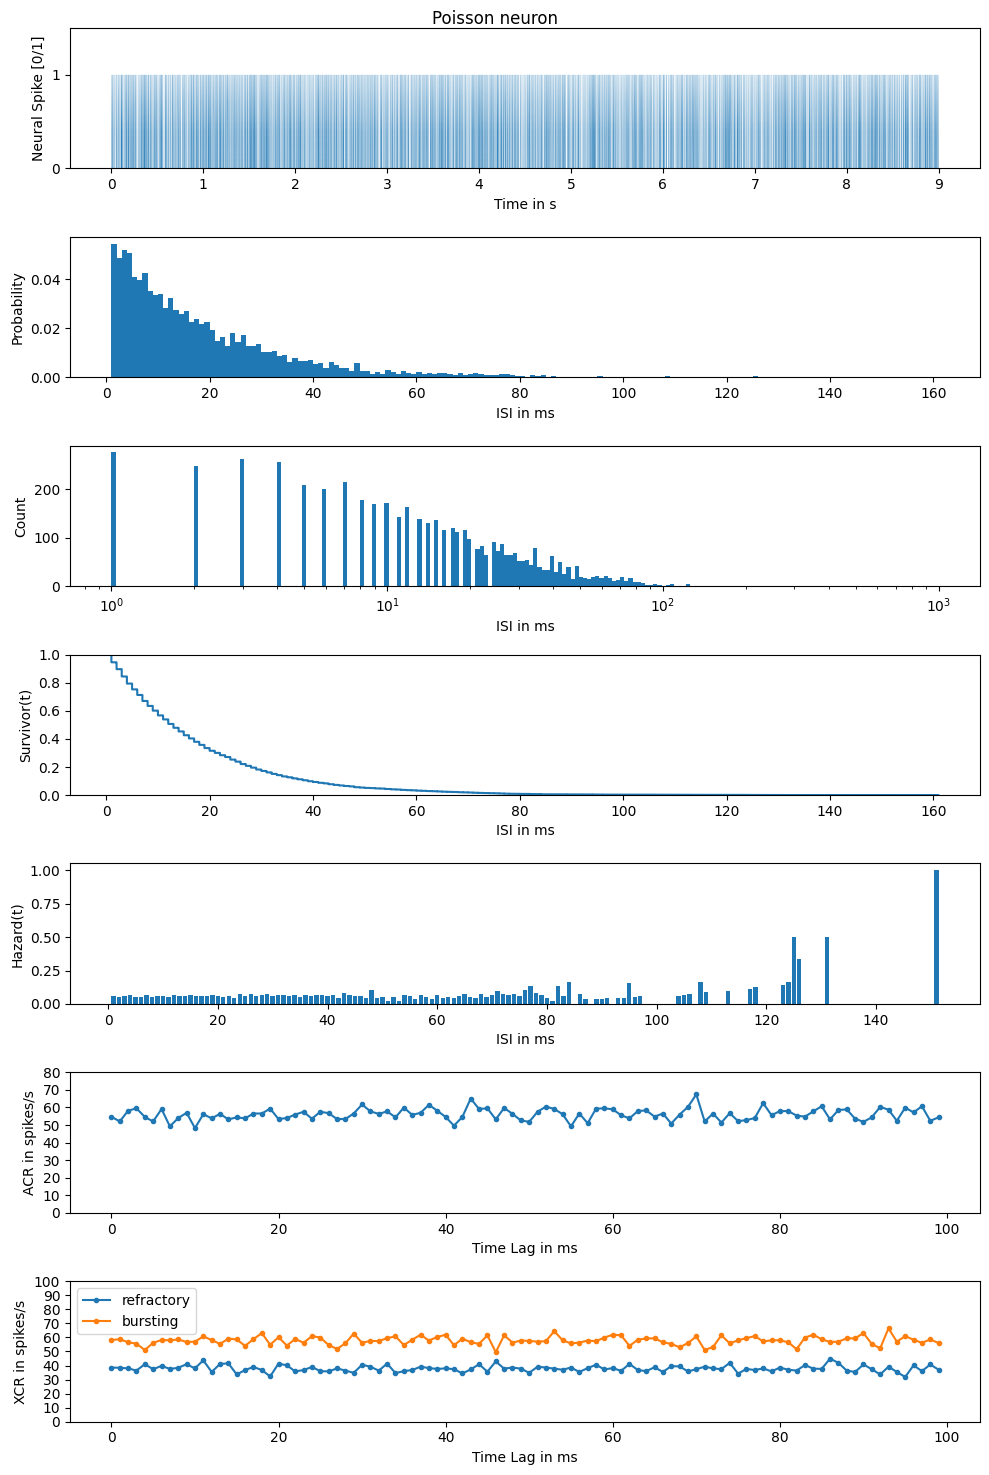

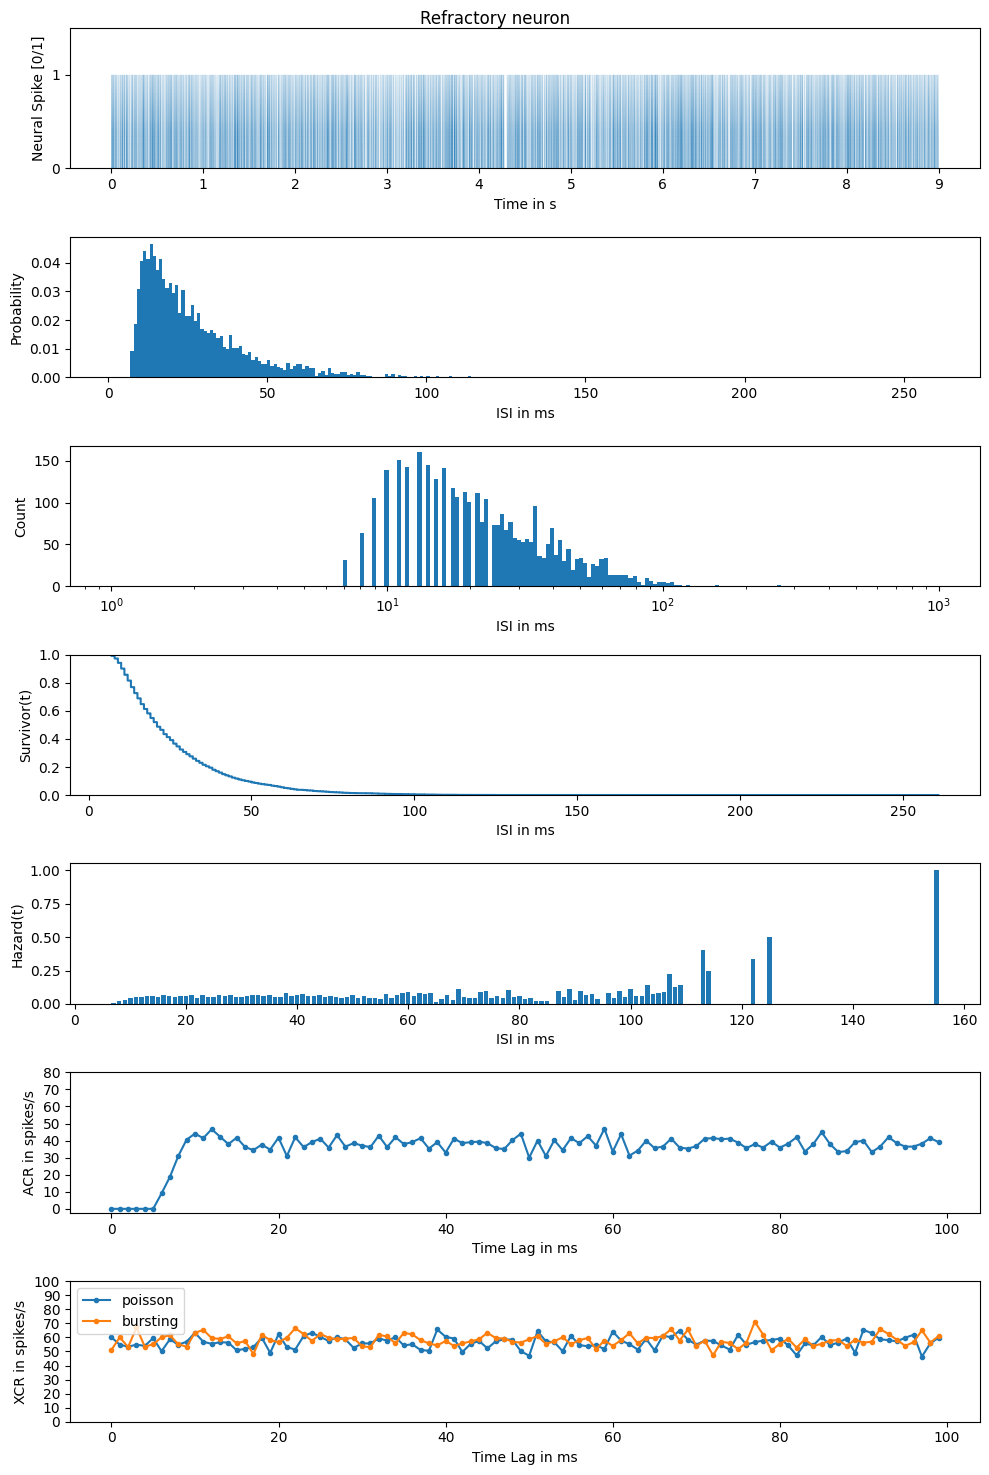

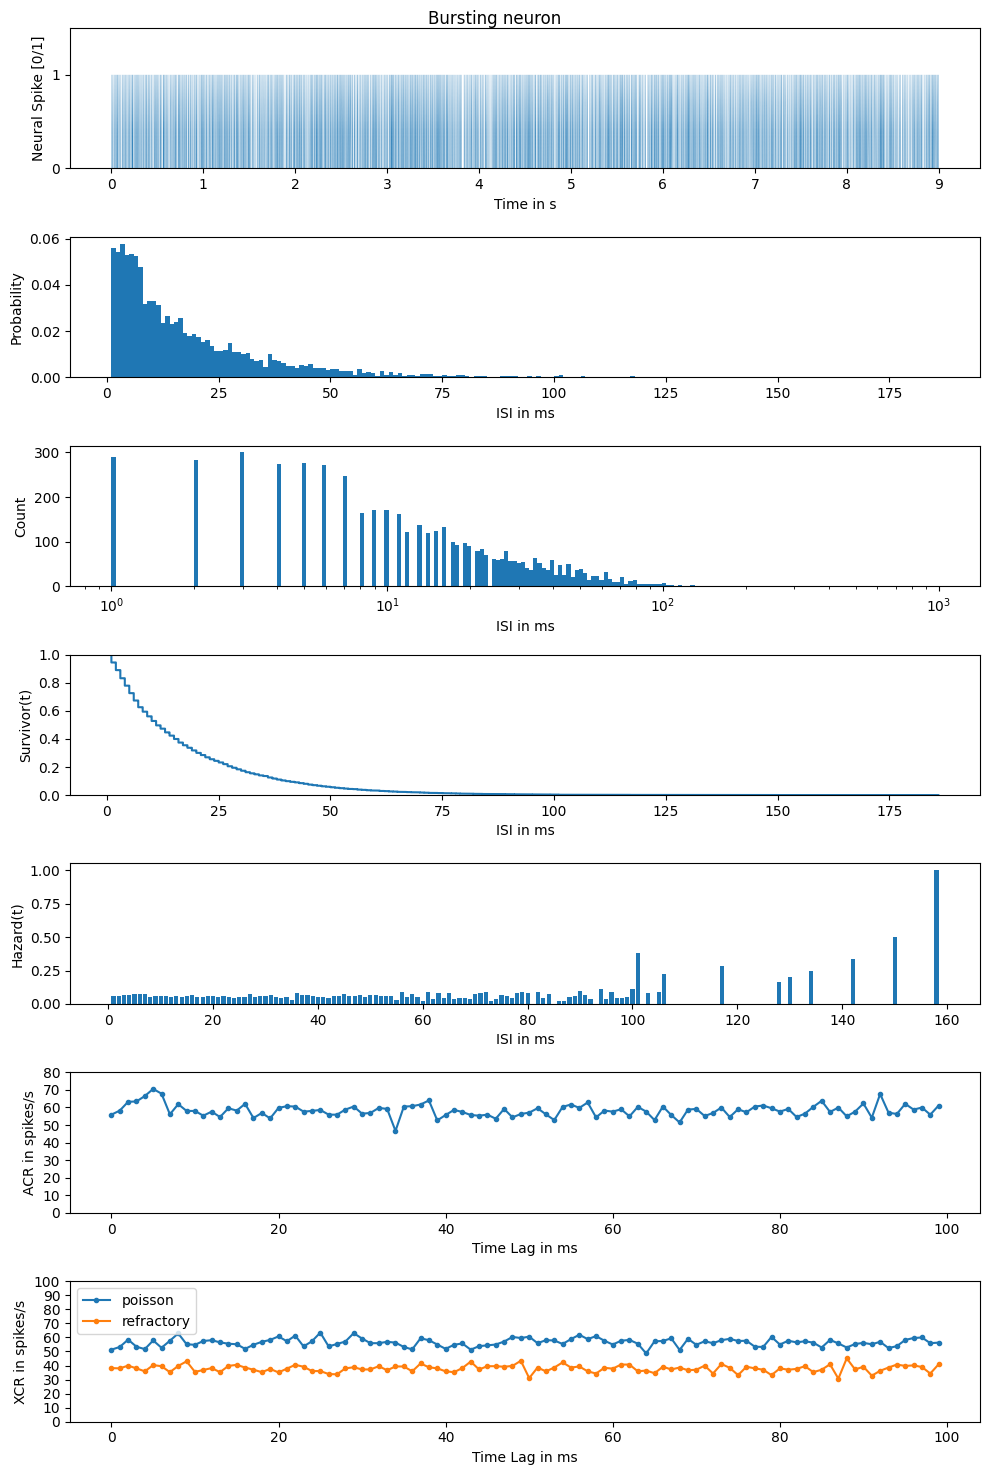

In [43]:
# Generate analytical plots for Poisson neuron
study_neuron(
    poisson_train, poisson_isis, titles[0], {"refractory": refractory_train, "bursting": burst_train}
)
# Generate analytical plots for refractory neuron
study_neuron(
    refractory_train, refractory_isis, titles[1], {"poisson": poisson_train, "bursting": burst_train}
)
# Generate analytical plots for bursting neuron
study_neuron(
    burst_train, burst_isis, titles[2], {"poisson": poisson_train, "refractory": refractory_train}
)

## Section F

Each figure above illustrates the spike train and ISI profile of the Poisson neuron, the refractory neuron and the bursting neuron, in such order. From top to bottom, each figure includes:

1. Spike train plot: visualisation of the binary spikes on the y axis over time on the x axis, for a duration of 9 seconds.
2. Temporal interval histogram (TIH): a histogram of the probabilities of ISIs shown on a Euclidean time scale.
3. xlog TIH: a histogram of the absolute counts of ISIs shown on a logarithmic time scale.
4. Survivor function $S(t)$: the probability of non-occurrence for each ISI given all previous ISIs did not occur either.
5. Hazard function $h(t)$: the probability of occurrence of each ISI given all previous ISIs did not occur.
6. Autocorrelation: the correlation of a spike train with itself for every timelag between 1 and 100 ms normalised to firing rate.
7. Cross-correlation: the correlation between two spike trains for every timelag between 1 and 100 ms normalised to firing rate.

Differences in the spike train plots between neurons are minimal. It seems that for the refractory neuron longer ISIs occur more frequently than for the Poisson and the bursting neuron. However, it cannot be clearly stated exclusively from the spike train plot. In contrast, the both the Euclidean and the log TIHs offer visual discrepancies between the neurons. In particular, the ISIs of the Poisson and the bursting neurons seem to decay exponentially, although the latter shows a higher probability for shorter ISIs than the former likely due to the bursting period. The log TIH can discriminate especially well the refractory neuron from the other two, because ISIs in the range of the refractory period (1-10 ms) show a virtually null probability, and the most frequent ISI only lies around 17 ms followed by an exponential decay similar to the other two neurons.

Also in the case of the survivor curve, the bursting neuron shares similarities with the Poisson neuron, whereas the refractory neuron does not. Unlike the other two, the survivor function of the refractory neuron starts descending at ISIs above 0 ms, roughly in the range of 10 ms. Compared to the other two neurons, the tail of the curve also stretches further by about 20 ms, which means that the refractory neuron can reach ISIs longer by about 20 ms, also visible in the TIH and the hazard curve. The hazard function provided subtle yet visible differences between both the refractory and the bursting neurons compared to the Poisson control. Specifically, the first and the second exhibited an smoother increase from low probabilities to unity for ISIs larger than 100 ms, whereas the increase was steeper for the Poisson neuron, which might indicate that refraction or bursting could introduce some degree of interdependence between adjacent ISIs.

Regarding autocorrelations for lagtimes within 100 ms, the refractory neuron but not the bursting neuron differ from the of the Poisson neuron. The refractory neuron initially shows null autocorrelations within the refractory period, then escalates between 5 and 15 ms to ultimately reach and oscillate around a baseline firing rate around 40 spikes/s. In contrast, the bursting and Poisson neuron exhibit a continuous oscillatory autocorrelation around 60 spikes/s. The cross-correlations between the neurons stayed relatively constant over lagtimes within 100 ms. Interestingly, the average cross-correlation between the bursting neuron and the Poisson neuron appeared higher than that between the refractory neuron and the Poisson neuron. Thus, the divergence in auto- and cross-correlation might offer an additional alternative strategy to assess the similarity between a neuron under investigation and the Poisson control.

Overall, it seems that conditions slightly distant from Poissonian, such as refractory and bursting behaviour, can be partially recognised by their autocorrelation. However, combining it with other methods such as TIH, hazard function and cross-correlation may represent a more powerful approach.

# Task 2: Encoding: GLM, optimal kernel and STA

In [44]:
# Set figure dimensions
plt.rcParams["figure.figsize"] = [10, 4]

## Section A



In [45]:
# Load data on main experiment
sta = scipy.io.loadmat("GLM/STA.mat")
spikeTrain = sta["spikeTrain"].flatten()
stimSig = sta["stimSig"].flatten()

In [46]:
# Compute experimental parameters
test_freq = 2000
test_period = 1 / test_freq

test_n = spikeTrain.shape[0]
test_time = test_n * test_period

test_samples = np.arange(0, test_time, test_period)

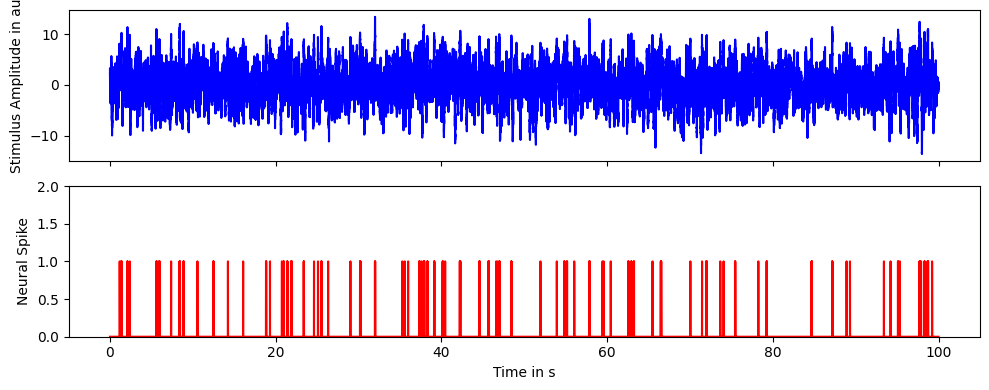

In [47]:
# Visualise stimulus and response
fig, axes = plt.subplots(2, sharex=True)

axes[0].plot(test_samples, stimSig, c="b")
axes[1].plot(test_samples, spikeTrain, c="r")

axes[1].set_ylim(0, 2)
axes[1].set_xlabel("Time in s")
axes[0].set_ylabel("Stimulus Amplitude in au")
axes[1].set_ylabel("Neural Spike")

plt.tight_layout()

In [48]:
# Define function to compute spike-triggered average
def compute_sta(train, stimulus, window):

    stimulus_list = []
    indices = np.where(train == 1)[0]

    keep = np.where((indices >= window) & (indices <= len(stimulus) - window))
    indices = indices[keep]

    for idx in indices:
        spike_triggered_stimulus = stimulus[idx - window:idx + window + 1]
        stimulus_list.append(spike_triggered_stimulus)

    stimulus_arr = np.concatenate(stimulus_list).reshape(len(stimulus_list), 2 * window + 1)
    sta_means = np.mean(stimulus_arr, axis=0)
    sta_stds = np.std(stimulus_arr, axis=0)

    return sta_means, sta_stds

In [49]:
# Compute spike-triggered average for a -/+500 ms window
window_size = 0.5
window = int(window_size * test_freq)

sta_means, sta_stds = compute_sta(spikeTrain, stimSig, window)

Text(0, 0.5, 'Stimulus Amplitude in au')

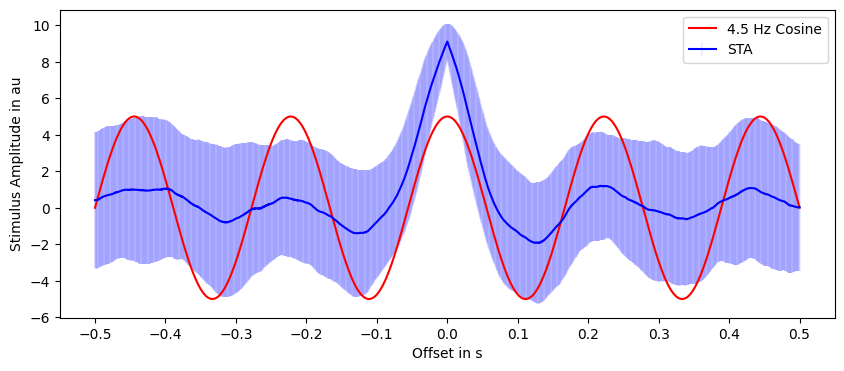

In [50]:
# Visualise spike-triggered average and its optimal activation frequency
window_range = np.arange(-window_size, window_size + test_period, test_period)
xticks_range = np.arange(-window_size, window_size + 0.1, 0.1)

plt.errorbar(window_range, sta_means, yerr=sta_stds, elinewidth=0.1, c="b", label="STA")
plt.plot(window_range, 5 * np.cos(2 * np.pi * 4.5 * window_range), c="r", label="4.5 Hz Cosine")

plt.xticks(xticks_range)
plt.legend()

plt.xlabel("Offset in s")
plt.ylabel("Stimulus Amplitude in au")

As illustrated by the figure above, the optimal frequency to activate the neuron lies around 4.5 Hz, for which the cosine curve oscillates in synchrony and with neglectable phase with respect to the STA of the neuron.

## Section B

In [51]:
# Load data on complementary experiment
kernel = scipy.io.loadmat("GLM/kernel.mat")
stim = kernel["stim"].flatten()
resp = kernel["resp"]

In [52]:
# Compute experimental parameters
train_freq = 1000
train_period = 1 / train_freq

train_n = resp.shape[1]
train_time = train_n * train_period

train_samples = np.arange(0, train_time, train_period)
train = np.mean(resp, axis=0)

In [53]:
# Define function for computing and plotting firing rates with sliding square window
def plot_square(train, samples, window_size, step=1e-3, mode="same", plot=True, c="b"):

    window = np.ones(int(window_size / step))
    window /= sum(window)

    firing_rates = np.convolve(train, window, mode) / step
    
    if plot:
        plt.plot(samples, firing_rates, c=c, label=window_size)

    return firing_rates

The best size of the sliding window for the complementary data appeared to be 1 second. This was determined by visually comparing the results from window sizes of 0.3, 0.5, 0.7, 1 and 1.3 seconds. The selected window size provides a relatively good tradeoff between signal and noise amplitude, or signal-to-noise ratio.

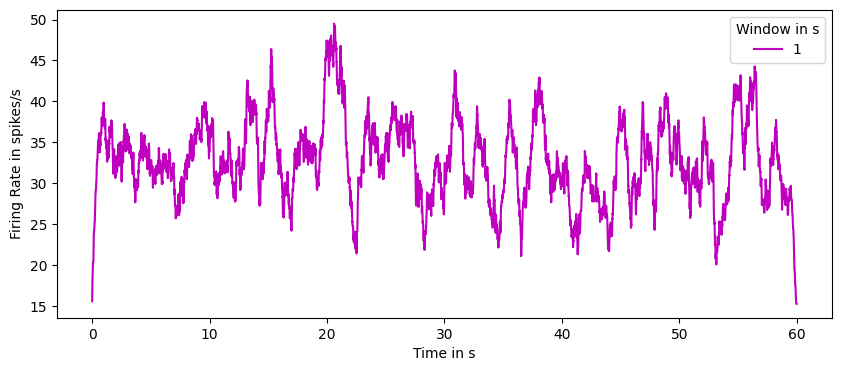

In [54]:
# Plot firing rates for different window sizes
# plot_square(train, train_samples, 0.3, "b")
# plot_square(train, train_samples, 0.5, "r")
# plot_square(train, train_samples, 0.7, "k")
# plot_square(train, train_samples, 1.3, "y")

train_r = plot_square(train, train_samples, 1, c="m")

plt.xlabel("Time in s")
plt.ylabel("Firing Rate in spikes/s")
plt.legend(title="Window in s", loc="upper right")

The optimal linear kernel can be determined from the STA of the white noise stimulus multiplied by the average firing rate of the neuron and divided by the variance of the white noise stimulus, as follows:

$D_{opt}(t) = [\langle r \rangle\, \cdot\, STA(t)] : \sigma_{s}^{2}$

Thus, it is first necessary to compute the STA of the white noise stimulus averaged across the 100 trials. For simplicity, the STA is found for a -/+100 ms window and later restricted to the non-null region.

In [55]:
# Compute spike-triggered average for a -/+100 ms window across every trial
window_size = 0.1
window = int(window_size * train_freq)

sta_arr = np.apply_along_axis(lambda train: compute_sta(train, stim, window), 1, resp)
sta_stats = np.mean(sta_arr, axis=0)

sta_means, sta_stds = sta_stats[0, :], sta_stats[1, :]

The STA of the white noise stimulus is visualised below.

Text(0, 0.5, 'Stimulus Amplitude in au')

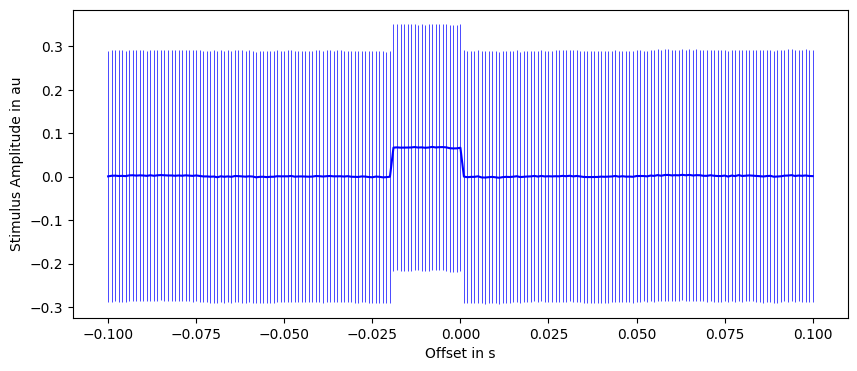

In [56]:
# Visualise spike-triggered average
window_range = np.arange(-window_size, window_size + train_period, train_period)

plt.errorbar(window_range, sta_stats[0, :], yerr=sta_stats[1, :], elinewidth=0.5, c="b")

plt.xlabel("Offset in s")
plt.ylabel("Stimulus Amplitude in au")

The STA of the white noise stimulus only shows non-null values in the 20 ms preceding the spike. This can be then combined with the mean firing rate and the variance of the white noise stimulus to obtain the optimal linear kernel $D_{opt}$.

Text(0, 0.5, 'spikes / (s * au)')

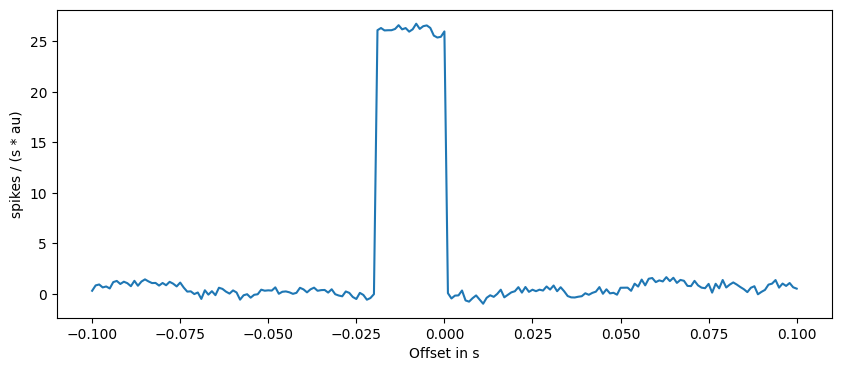

In [57]:
# Determine the optimal kernel
opt_kernel = np.mean(train_r) * sta_means / np.var(stim)

plt.plot(window_range, opt_kernel)

plt.xlabel("Offset in s")
plt.ylabel("spikes / (s * au)")

The kernel seems 

## Section C

The firing rates for the main experiment are predicted with the following model:

$r_{est} = r_{0} + D(t)\, *\, s(t)$

where $r_0$ is the average firing rate of the main experiment, $D(t)$ is the optimal kernel found in the previous section and $s(t)$ is the stimulus array of the main experiment. All these operations are performed below.

In [58]:
# Normalise kernel to unit length
norm_kernel = opt_kernel / np.sum(opt_kernel)

# Convolve with optimal convolution window (hard-coded)
half_length = norm_kernel.size // 2
optimal_range = range(half_length - 20, half_length + 3)
L = np.convolve(norm_kernel[optimal_range], stimSig, mode="same")

# Predict firing rates
test_r = plot_square(spikeTrain, test_samples, 4, step=test_period, plot=False)
r0 = np.mean(test_r)
r_est = r0 + L

Because the main experiment contained a considerable amount of noise, the actual firing rates were smoothened with a relatively big sliding window of 4 seconds. The performance of the model was assessed with the Root Mean Square Error (RMSE) between actual and predicted firing rates. The size of the sliding window used to smoothen the predicted firing rates was optimised to return a minimal RMSE as follows.

Optimal window size: 1.50, RMSE: 11.62


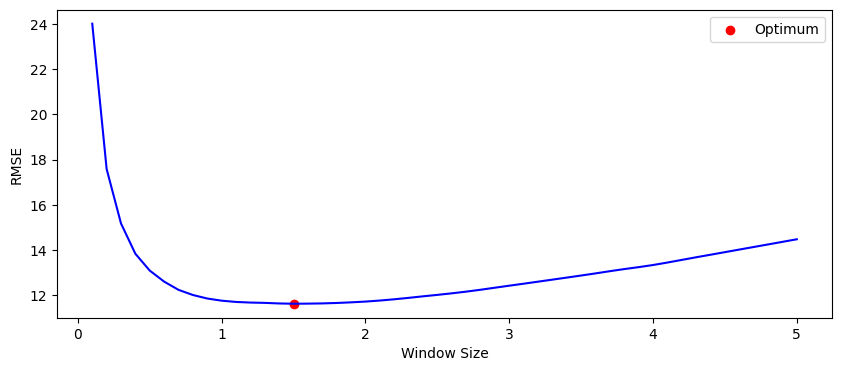

In [59]:
# Find window size that minimises RMSE
rmse_dict = {}

for window_size in np.arange(0.1, 5.1, 0.1):

    window = np.ones(int(window_size / test_period))
    window /= sum(window)

    conv_est = 10 * np.convolve(r_est, window, "same") - 130
    rmse_dict[window_size] = metrics.root_mean_squared_error(test_r, conv_est)

optimal_window_size = min(rmse_dict, key=rmse_dict.get)
print(f"Optimal window size: {optimal_window_size:.2f}, RMSE: {rmse_dict[optimal_window_size]:.2f}")

plt.plot(rmse_dict.keys(), rmse_dict.values(), c="b")
plt.scatter(optimal_window_size, rmse_dict[optimal_window_size], c="r", label="Optimum")

plt.xlabel("Window Size")
plt.ylabel("RMSE")
plt.legend()

An optimal window size of 1.5 seconds yields the minimal RMSE of 11.62. Therefore, such window size is used to smoothen the predicted firing rates, which are then compared to the actual ones in the figure below.

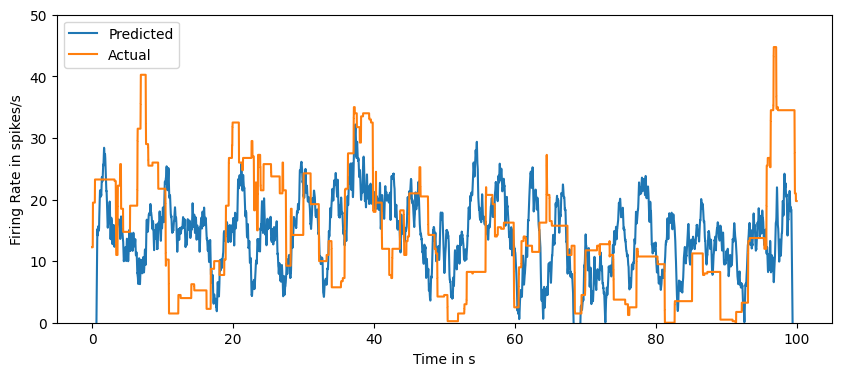

In [60]:
# Compare predicted and actual firing rates
window = np.ones(int(optimal_window_size / test_period))
window /= sum(window)

conv_est = 10 * np.convolve(r_est, window, "same") - 130

plt.plot(test_samples, conv_est, label="Predicted")
plt.plot(test_samples, test_r, label="Actual")

plt.ylim([0, 50])
plt.xlabel("Time in s")
plt.ylabel("Firing Rate in spikes/s")
plt.legend(loc="upper left")

The model does not fit the data from the main experiment very well, but it is able to roughly reproduce the original firing pattern. Specifically, the model performs better in the central part of the experiment than at the beginning and the end, which suggests that convolution may introduce distortion in the edges. To further improve the model, the window size for the real data could be optimised as well. Interestingly, a threshold firing rate can be applied to the model to simulate a spike train that resembles that of the main experiment. The two spike trains are compared below.

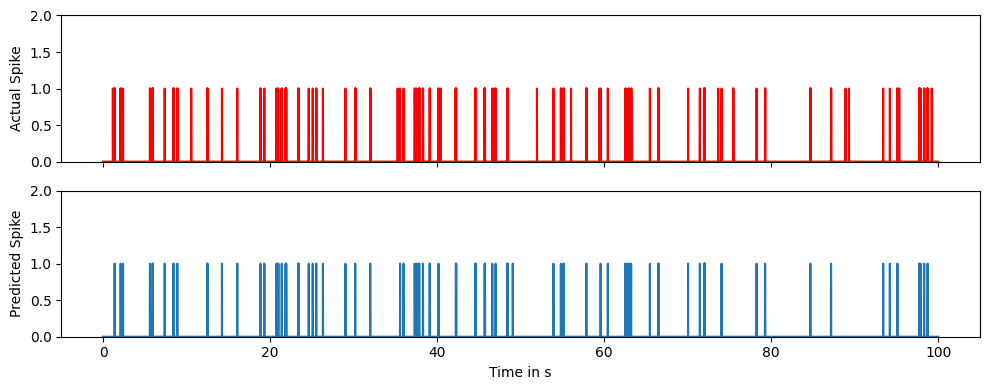

In [61]:
# Simulate spike train with firing threshold of 21 spikes/s
threshold = 21
pred_spikes = np.where(r_est > threshold, 1, 0)

# Compare actual and simulated spike train
fig, axes = plt.subplots(2, sharex=True)

axes[0].plot(test_samples, spikeTrain, c="r")

axes[1].plot(test_samples, pred_spikes)

axes[0].set_ylim(0, 2)
axes[1].set_ylim(0, 2)

axes[1].set_xlabel("Time in s")
axes[0].set_ylabel("Actual Spike")
axes[1].set_ylabel("Predicted Spike")

plt.tight_layout()

Finally, the simulated spike train is shown in comparison with the actual spike train. Clearly, applying a threshold of 21 spikes/s to the model seems to yield a very similar spike train to the original one.

# Task 3: PSTH and ROC

In [62]:
# Set figure dimensions
plt.rcParams["figure.figsize"] = [10, 4]

## Section A

In [63]:
# Import datasets
sound_times = pd.read_csv("PSTH/sound_times.csv", header=None).to_numpy()
lick_times = pd.read_csv("PSTH/lick_times.csv", header=None).to_numpy()
spike_trains = pd.read_csv("PSTH/spike_trains.csv", header=None).to_numpy()

In [64]:
# Define function to process spike train into based on stimulus array and trial window
def process_spike_trains(spike_trains, event_times, trial_window):

    trial_list = []
    event_idx = np.round(event_times * 1e3).astype(int)

    for i in range(spike_trains.shape[1]):
        
        if i in event_idx:

            trial = spike_trains[:, i + trial_window[0]:i + trial_window[1]]
            trial_list.append(trial)

    spike_arr = np.hstack(trial_list).reshape(4, len(trial_list), -1)
    psth_vals = 1000 * np.mean(spike_arr, axis=1)

    return spike_arr, psth_vals

# Define function to generate a raster plot given a trial window
def plot_raster(arr, trial_window, ax):

    spike_list = [np.where(arr[i, :])[0] for i in range(arr.shape[0])]

    ax.eventplot(spike_list, colors="k")
    ax.axvline(x=-trial_window[0], color="r", linestyle="--")

    ax.set_ylabel("Trial")

# Define function to generate a PSTH given a trial window
def plot_psth(psth_vals, trial_window, ax):
    
    trial_range = np.arange(trial_window[0], trial_window[1], 100) / 1000
    time_range = np.arange(0, trial_window[1] - trial_window[0])
    xticks_range = np.arange(0, trial_window[1] - trial_window[0], 100)

    ax.bar(time_range, psth_vals, color="k")
    ax.axvline(x=-trial_window[0], color="r", linestyle="--")

    ax.set_xticks(ticks=xticks_range, labels=trial_range)
    ax.set_xlabel("Offset in s")
    ax.set_ylabel("Firing Rate in spikes/s")

In [65]:
# Process spike train with window around sound event
trial_window = [-200, 1001]
spike_arr, psth_vals = process_spike_trains(spike_trains, sound_times, trial_window)

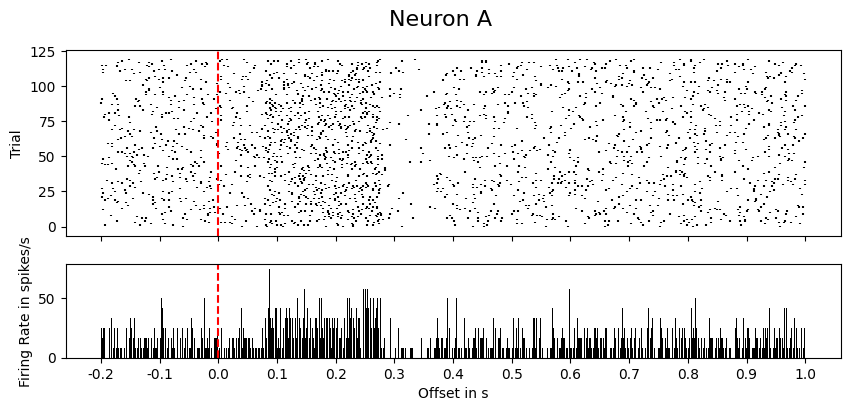

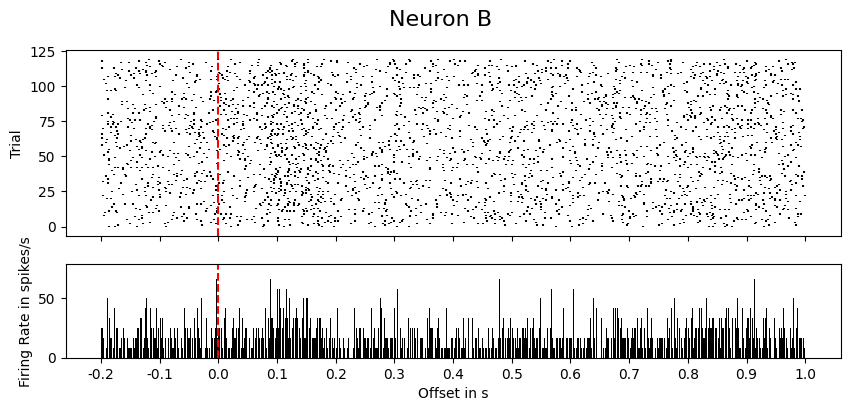

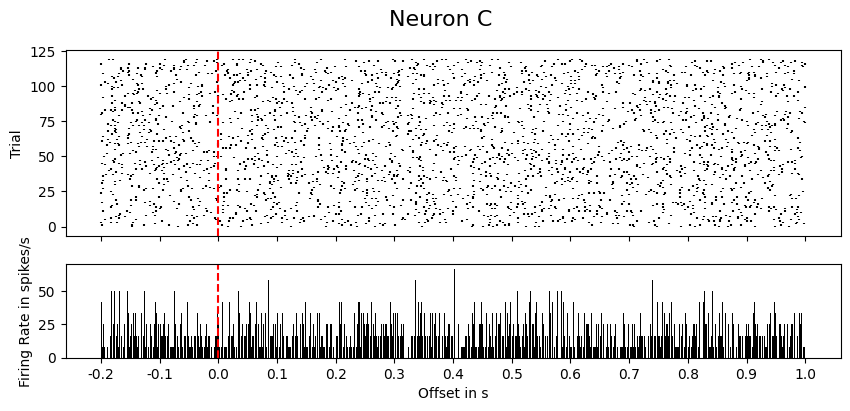

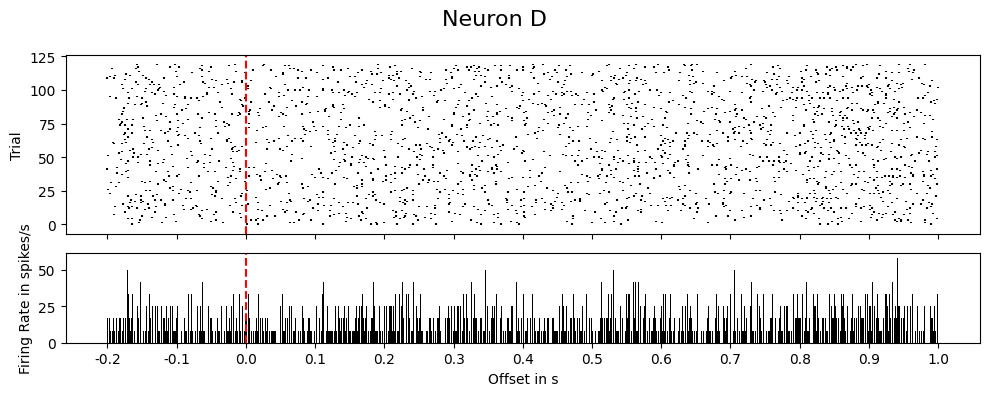

In [66]:
# Visualise raster plot and PSTH for each neuron for window around sound event
for i in range(spike_trains.shape[0]):

    fig, axes = plt.subplots(2, sharex=True, height_ratios=[2, 1])

    plot_raster(spike_arr[i], trial_window, axes[0])
    plot_psth(psth_vals[i], trial_window, axes[1])

    fig.suptitle(f"Neuron {'ABCD'[i]}", fontsize=16)

plt.tight_layout()

## Section B

Based on the figures, there seems to be an increase in firing rate after the sound stimulus for neurons A and B, but not for neurons C and D. In particular, neuron A exhibits an increase in average firing rate from about 15 spikes/s to about 40 spikes/s between 100 and 300 ms after the stimulus onset, followed by a sharp refractory period of about 100 ms. Neuron B shows a similar response, but limited to a window between 100 and 200 ms after the stimulus onset and with a shorter and less evident refractory period. The average firing rate of neurons C and D appeared unchanged upon the stimulus onset, and it continues to fluctuate in a stochastic manner over the entire window. In conclusion, neuron A and to a less extent neuron B experienced an increase in average firing rate after stimulus onset, whereas neurons C and D did not seem to respond to the stimulus and maintained their baseline firing pattern.

## Section C

In [67]:
# Process spike train with window around sound event
trial_window = [-500, 501]
spike_arr, psth_vals = process_spike_trains(spike_trains, lick_times, trial_window)

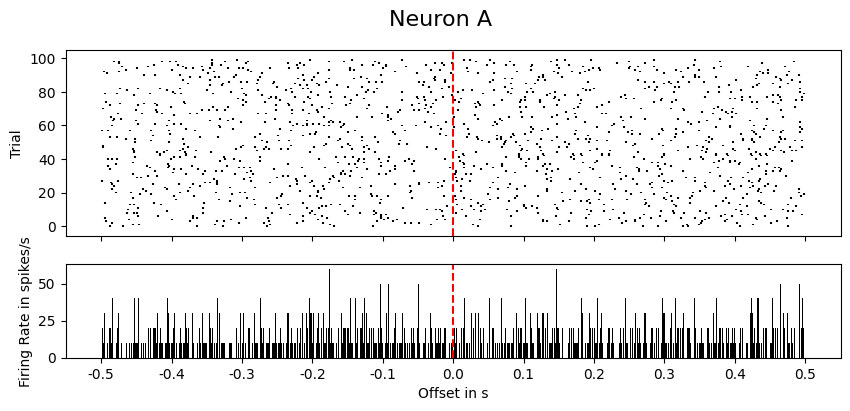

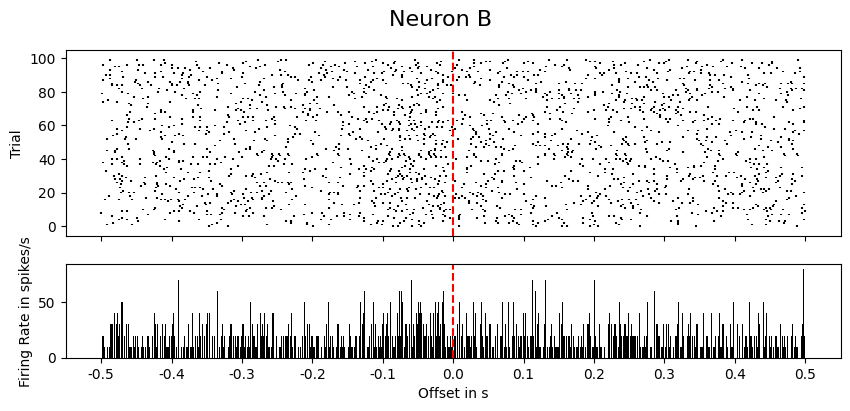

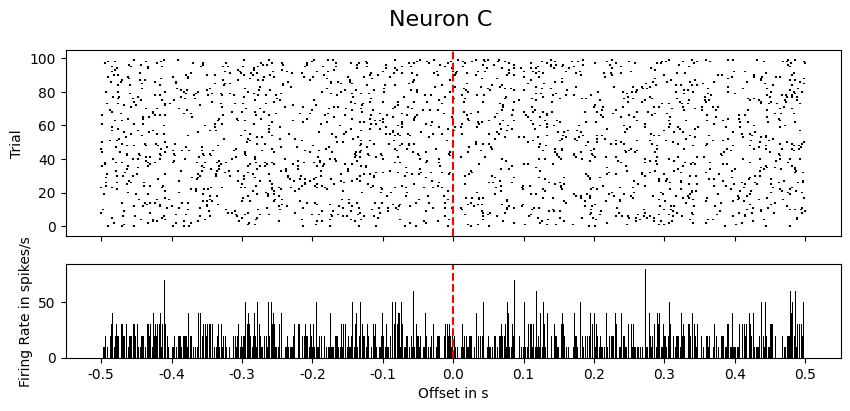

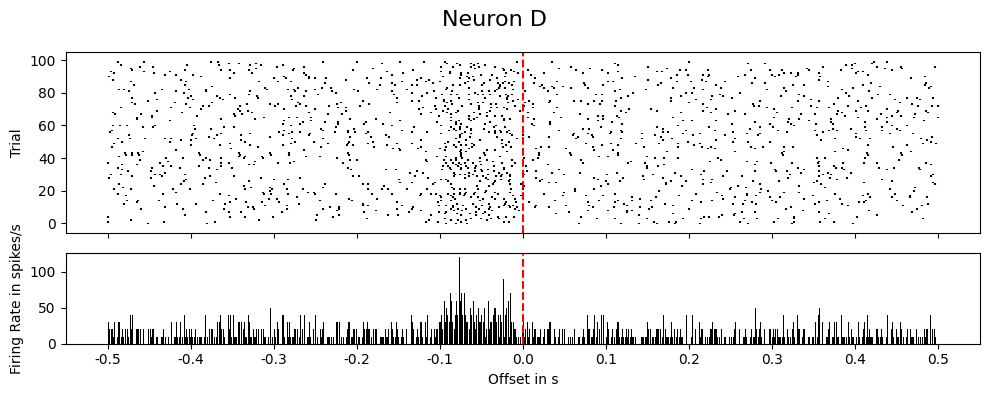

In [68]:
# Visualise raster plot and PSTH for each neuron for window around sound event
for i in range(spike_trains.shape[0]):

    fig, axes = plt.subplots(2, sharex=True, height_ratios=[2, 1])

    plot_raster(spike_arr[i], trial_window, axes[0])
    plot_psth(psth_vals[i], trial_window, axes[1])

    fig.suptitle(f"Neuron {'ABCD'[i]}", fontsize=16)

plt.tight_layout()

Based on the figures above, neurons B and D exhibit an increased firing rate in the 100 ms prior to licking, whereas neurons A and C show a relatively unchanged firing pattern over the entire trial. Remarkably, neurons B and D experience an increase in average firing rate from about 15 spikes/s to about 40 spikes/s only within 100 ms prior to licking. However, their firing pattern seems slightly refracted in the 10 ms prior to licking and ultimately returns to normality during and after licking. Such behaviour may suggest that these two neurons are involved in the intention and planning of licking. In conclusion, neurons B and D, but not neurons A and C show sensitivity to licking in the 100 ms before the action itself.

## Section D

In [69]:
# Import dataset
lick_df = pd.read_csv("PSTH/fr_pre_licks.csv")

In [70]:
# Evaluate mismatch between true and predicted licks
lick_df["pred"] = lick_df["fr_100ms_pre"] >= 20
lick_df["pred"] = lick_df["pred"].astype(int)
lick_df["divergence"] = lick_df["lick"] - lick_df["pred"]

In [71]:
# Define function to calculate accuracy
def find_accuracy(group):

    accuracy = 1 - np.abs(group["divergence"]).sum() / group["lick"].count()
    return 100 * accuracy

# Define function to calculate false positive rate
def find_fpr(group):

    false_positives = np.sum(np.where((group["lick"] == 0) & (group["pred"] == 1), 1, 0))
    true_negatives = np.sum(np.where((group["lick"] == 0) & (group["pred"] == 0), 1, 0))

    false_positive_rate = false_positives / (false_positives + true_negatives)
    return 100 * false_positive_rate

# Define function to calculate true positive rate
def find_tpr(group):

    true_positives = np.sum(np.where((group["lick"] == 1) & (group["pred"] == 1), 1, 0))
    false_negatives = np.sum(np.where((group["lick"] == 1) & (group["pred"] == 0), 1, 0))

    true_positive_rate = true_positives / (true_positives + false_negatives)
    return 100 * true_positive_rate

In [72]:
# Summarise predictive performance for every neuron with a threshold of 20 spikes/s
gr_lick_df = lick_df.groupby("neuron")
acc = gr_lick_df.apply(find_accuracy).to_list()
fpr = gr_lick_df.apply(find_fpr).to_list()
tpr = gr_lick_df.apply(find_tpr).to_list()

tab = {"Neuron": "ABCD", "ACC (%)": acc, "FPR (%)": fpr, "TPR (%)": tpr}

print(tabulate(tab, headers="keys"))

Neuron      ACC (%)    FPR (%)    TPR (%)
--------  ---------  ---------  ---------
A                50          2          2
B                60         80        100
C                48         18         14
D                95          0         90


The response of neurons to licking was predicted based on the average firing rate in the 100 ms preceding the licking event. The table above summarises predictive performance for the four neurons (A - D) with a threshold of 20 spikes/s. In other words, if the average firing rate is greater or equal to the threshold, a licking event is predicted and vice versa. Performance is measured in terms of overall accuracy (ACC), false positive rate (FPR) and true positive rate (TPR).

Performance varied across neurons. The best predictions were observed for neuron D, with 95% of the samples correctly predicted, no false positives as well as relatively high sensitivity (90% true positives). This suggests that the firing rate of neuron D tends to increase prior to licking. The second best performance was obtained for neuron B, with a 60% accuracy, a poor 80% FPR and an optimal TPR of 100%. This indicates that the firing rate of neuron B is usually higher than 20 spikes/s regardless of licking. As a result, sensitivity for neuron B was better than for neuron D, but the much larger FPR for the former resulted in a lower overall accuracy.

Predictions for neuron A are comparable to random choice (50% accuracy). While a relatively low FPR of 2% almost rivals with that of neuron D, a TPR of 2% signals that this neuron is characterised by a firing rate generally lower than 20 spikes/s regardless of licking. Finally, performance was lowest for neuron C, with an accuracy of 48%, an FPR of 18% and a TPR of 14%. For this neuron, firing rates lower or higher than the threshold occurr with similar probability regardless of licking, and thus firing rate seems clearly unrelated to licking events.

## Section E

In [73]:
# Define function to calculate FPR and TPR given a threshold of prediction
def apply_threshold(threshold, df):

    df["pred"] = df["fr_100ms_pre"] >= threshold
    df["pred"] = df["pred"].astype(int)

    gr_df = df.groupby("neuron")
    fpr = gr_df.apply(find_fpr).to_list()
    tpr = gr_df.apply(find_tpr).to_list()

    return fpr, tpr

In [74]:
# Compute FPR and TPR for thresholds between 1 and 50 spikes/s
threshold_list = range(1, 51)
roc_arr = np.vstack(list(map(lambda threshold: apply_threshold(threshold, lick_df), threshold_list)))

fpr_arr = roc_arr[range(0, roc_arr.shape[0], 2) , :]
tpr_arr = roc_arr[range(1, roc_arr.shape[0], 2), :]

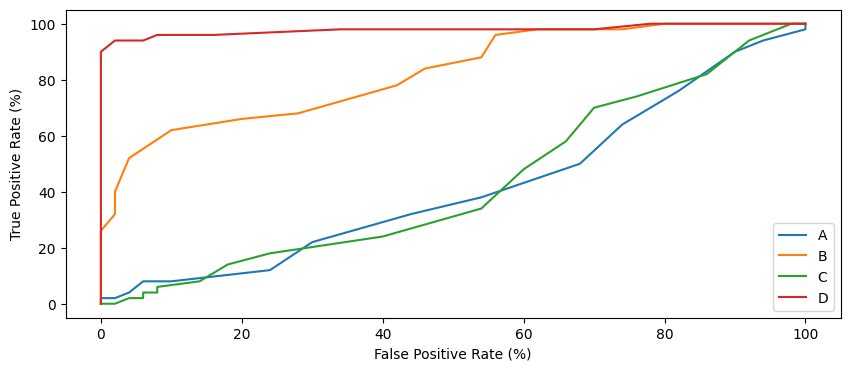

In [75]:
# Visualise predictive performance with a ROC curve
plt.plot(fpr_arr, tpr_arr)

plt.xlabel("False Positive Rate (%)")
plt.ylabel("True Positive Rate (%)")
plt.legend("ABCD")

As previously demonstrated with a threshold of 20 spikes/s, the ROC curve above illustrates that neurons D and to a less extent B provide the best early warning of a licking event occurring in the following 100 ms, whereas neurons A and C seem to fire independently of licking and thus do not represent good predictors of licking events. This can be deduced by the area under curve (AUC) of the four neurons, that is, a greater AUC is associated with a more advantageous tradeoff between a high TPR and a low FPR and thus greater discriminability between the distributions of negative (no licking) and positive events (licking). Such results are supported by the table below, where the AUCs for the four neurons are compared with one another.

In [76]:
# Compare AUCs of the four neurons
aucs = [metrics.auc(fpr_arr[:, i], tpr_arr[:, i]) for i in range(4)]
tab = {"Neuron": "ABCD", "AUC": aucs}

print(tabulate(tab, headers="keys"))

Neuron      AUC
--------  -----
A          4150
B          8238
C          4280
D          9784


# Bibliography

1. Gershon ED, Wiener MC, Latham PE, Richmond BJ. Coding strategies in monkey V1 and inferior temporal cortices. J Neurophysiol. 1998 Mar;79(3):1135-44. doi: 10.1152/jn.1998.79.3.1135. PMID: 9497396.
2. Gur M, Beylin A, Snodderly DM. Response variability of neurons in primary visual cortex (V1) of alert monkeys. J Neurosci. 1997 Apr 15;17(8):2914-20. doi: 10.1523/JNEUROSCI.17-08-02914.1997. PMID: 9092612; PMCID: PMC6573112.
3. Swindale NV, Spacek MA, Krause M, Mitelut C. Spontaneous activity in cortical neurons is stereotyped and non-Poisson. Cereb Cortex. 2023 May 24;33(11):6508-6525. doi: 10.1093/cercor/bhac521. PMID: 36708015; PMCID: PMC10233306.